#  Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report


In [2]:
df=pd.read_csv('pima-indians-diabetes_label.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#  EDA-exploratory data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnancies        768 non-null    int64  
 1   Glucose            768 non-null    int64  
 2   BloodPressure      768 non-null    int64  
 3   SkinThickness      768 non-null    int64  
 4   Insulin            768 non-null    int64  
 5   BMI                768 non-null    float64
 6   DiabetesPedigreeF  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Outcome            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.skew()

Pregnancies          0.901674
Glucose              0.173754
BloodPressure       -1.843608
SkinThickness        0.109372
Insulin              2.272251
BMI                 -0.428982
DiabetesPedigreeF    1.919911
Age                  1.129597
Outcome              0.635017
dtype: float64

In [7]:
df.kurt()

Pregnancies          0.159220
Glucose              0.640780
BloodPressure        5.180157
SkinThickness       -0.520072
Insulin              7.214260
BMI                  3.290443
DiabetesPedigreeF    5.594954
Age                  0.643159
Outcome             -1.600930
dtype: float64

<AxesSubplot:>

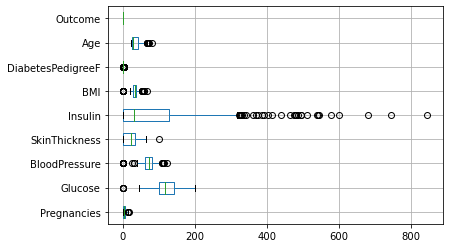

In [8]:
df.boxplot(vert=False)

##  Train test split

In [9]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [11]:
df.shape

(768, 9)

In [12]:
X_train.shape

(537, 8)

In [13]:
X_test.shape

(231, 8)

In [14]:
y_train.shape

(537,)

In [15]:
y_test.shape

(231,)

##  Model Building

In [16]:
model = DecisionTreeClassifier()

In [17]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
y_pred=model.predict(X_test)

##  Model Evaluation

In [19]:
accuracy_score(y_test,y_pred)

0.7142857142857143

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       146
           1       0.63      0.55      0.59        85

    accuracy                           0.71       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231



##  Overfitting check

In [21]:
y_train_pred=model.predict(X_train)

In [22]:
accuracy_score(y_train,y_train_pred)

1.0

In [23]:
y_train_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [24]:
np.array(y_train)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

- Decision tree is an OVERFITTING MODEL.
- It basically gives good accuracy for the training data and gives poor accuracy for testing data.
- In other terms it overfits the training data and cannot GENERALIZE the test data.

## Stratified Kfold CV

In [25]:
stf = StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

In [26]:
stf.get_n_splits(X=X,y=y)

10

In [27]:
dtc = DecisionTreeClassifier()

In [28]:
accuracy = []
for train_index,test_index in stf.split(X,y):
    print('Train = ',train_index,'Test = ',test_index) 
    X1_train,X1_test = X.iloc[train_index],X.iloc[test_index]  #fetching the original data points using iloc
    y1_train,y1_test = y.iloc[train_index],y.iloc[test_index]
    dtc.fit(X1_train,y1_train)
    y1_pred=dtc.predict(X1_test)
    accuracy.append(accuracy_score(y1_test,y1_pred))

Train =  [  1   2   3   4   5   6   7   8   9  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  58  59  60  61  62  63  64  65  67  68  69  70  71  72  73  74  75  76
  78  79  80  81  82  83  84  85  86  87  88  89  90  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 128 129 130 131 132 133 134
 135 136 140 141 142 143 145 146 147 148 149 150 151 152 153 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 171 172 174 175 176 177
 178 179 181 182 183 184 185 186 187 188 190 191 192 193 194 195 196 197
 198 200 201 202 203 204 205 206 207 208 209 210 211 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 234 235 236
 237 238 239 240 242 243 244 245 246 247 248 249 250 251 253 254 255 256
 257 258 260 261 263 264 265 266 267 270 2

Train =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  18
  19  20  23  24  25  26  27  28  30  31  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  48  49  50  51  52  53  55  56  57  58  59  60
  61  62  64  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 113 114 115 116 117 118
 119 121 122 123 124 125 126 127 128 129 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 146 147 148 149 150 151 152 153 154 155 156 157
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 208 209 210 211 212 213 214
 215 216 218 219 220 221 222 223 225 226 227 228 229 230 231 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 2

In [29]:
accuracy

[0.6623376623376623,
 0.6883116883116883,
 0.7272727272727273,
 0.7402597402597403,
 0.7532467532467533,
 0.7272727272727273,
 0.5714285714285714,
 0.7272727272727273,
 0.6710526315789473,
 0.6578947368421053]

In [30]:
np.mean(accuracy)

0.6926349965823649

##  Hyperparameter Tuning using GridSearchCV

In [31]:
dtc = DecisionTreeClassifier()

In [32]:
param = {'min_weight_fraction_leaf':[0.0,0.1,0.2,0.3],'max_features':['auto', 'sqrt', 'log2',1,2,3,4,5,6,7,8,0.5]}

In [33]:
gcv = GridSearchCV(estimator=dtc,param_grid=param,cv=10)

In [34]:
gcv.fit(X,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2', 1, 2, 3, 4, 5,
                                          6, 7, 8, 0.5],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3]})

In [35]:
gcv.best_params_

{'max_features': 7, 'min_weight_fraction_leaf': 0.1}

In [36]:
dtc=DecisionTreeClassifier(max_features=7,min_weight_fraction_leaf=0.1)

In [37]:
accuracy = []
for train_index,test_index in stf.split(X,y):
    #print('Train = ',train_index,'Test = ',test_index) 
    X1_train,X1_test = X.iloc[train_index],X.iloc[test_index]  #fetching the original data points using iloc
    y1_train,y1_test = y.iloc[train_index],y.iloc[test_index]
    dtc.fit(X1_train,y1_train)
    y1_pred=dtc.predict(X1_test)
    accuracy.append(accuracy_score(y1_test,y1_pred))

In [38]:
np.mean(accuracy)

0.7252221462747779

Making prediction for new record

In [39]:
new_record=[[1,120,70,20,0,28,0.88,32]]

In [40]:
model.predict(new_record)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [41]:
model.predict_proba(new_record)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0., 1.]])

In [42]:
new_record=[[1,80,70,20,0,28,0.88,32]]

In [43]:
model.predict(new_record)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [44]:
model.predict_proba(new_record)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[1., 0.]])

In [45]:
new_record=[[1,80,70,20,0,28,0.88,32],[0,90,66,30,40,24,0.5,30]]

In [46]:
model.predict(new_record)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0, 0], dtype=int64)

In [47]:
model.predict_proba(new_record)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[1., 0.],
       [1., 0.]])

In [48]:
new_record=pd.DataFrame(new_record,columns=df.drop('Outcome',axis=1).columns)

In [49]:
new_record

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeF,Age
0,1,80,70,20,0,28,0.88,32
1,0,90,66,30,40,24,0.50,30


In [50]:
model.predict(new_record)

array([0, 0], dtype=int64)